In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape


(5110, 12)

In [2]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [4]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [5]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
df['stroke'].value_counts()
X = df.drop('stroke',axis=1)
y = df["stroke"]

In [6]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)   
    plt.ylabel('PR_Auc score')
    plt.legend(loc='best')
    plt.show()

In [7]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [8]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('PR_Auc score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

scaler=MinMaxScaler()
one_hot_encoder=OneHotEncoder()

numercial_cols=['age', 'bmi', 'avg_glucose_level']
catergorical_cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep=make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")

s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)





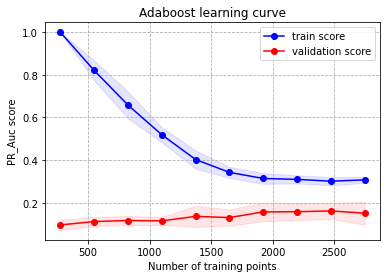

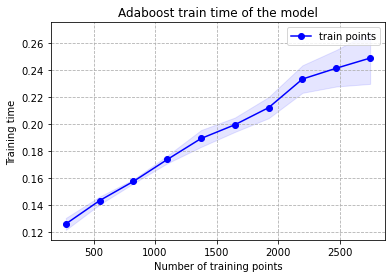

Adaboost: PR-Auc= 0.170
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1410
           1       0.12      0.81      0.21        63

    accuracy                           0.74      1473
   macro avg       0.56      0.78      0.53      1473
weighted avg       0.95      0.74      0.82      1473

[[1045  365]
 [  12   51]]


In [11]:
pipeline = make_pipeline(data_prep,AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',random_state=40,max_depth=1)))

train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Adaboost learning curve')
plot_train_time_curve(train_sizes, fit_times, 'Adaboost train time of the model')


from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('Adaboost: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [11]:
print(pipeline.steps[1][1].get_params())

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': 40, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=40), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = list(range(1,100,10))
learning_rates = list(np.arange(.001, .2, .01))
parameters = dict(adaboostclassifier__n_estimators=n_estimators,adaboostclassifier__learning_rate=learning_rates)
#grid_search_cv = GridSearchCV(pipeline, parameters,cv=s_kfold, scoring='roc_auc')
rand_search_cv = RandomizedSearchCV(pipeline, parameters,cv=s_kfold, n_iter=100, scoring='average_precision')
rand_search_cv.fit(X_train, y_train)
print("Tuned Ada boost best params: {}".format(rand_search_cv.best_params_))



Tuned Ada boost best params: {'adaboostclassifier__n_estimators': 91, 'adaboostclassifier__learning_rate': 0.18099999999999997}


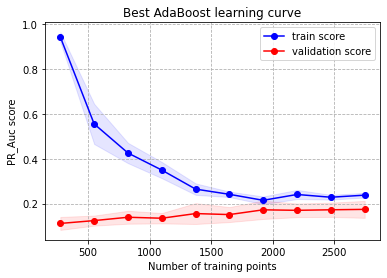

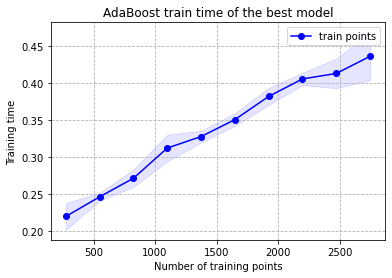

AdaBoost: Predict Time= 0.056
AdaBoost: PR-Auc= 0.185
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1410
           1       0.11      0.84      0.20        63

    accuracy                           0.71      1473
   macro avg       0.55      0.77      0.51      1473
weighted avg       0.95      0.71      0.79      1473

[[986 424]
 [ 10  53]]


In [11]:
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
best_pipeline = make_pipeline(data_prep,AdaBoostClassifier(learning_rate= .18099,n_estimators=91,base_estimator=DecisionTreeClassifier(max_depth=1,class_weight='balanced',random_state=40)))
train_sizes, train_scores, test_scores,fit_times, _ = learning_curve(estimator=best_pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold, scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
plot_learning_curve(train_sizes, train_scores, test_scores,'Best AdaBoost learning curve')
plot_train_time_curve(train_sizes, fit_times, 'AdaBoost train time of the best model')

from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
best_pipeline.fit(X_train, y_train)

# calculate pr auc
import time
start = time.time()
y_pred = best_pipeline.predict(X_test)
yhat = best_pipeline.predict_proba(X_test)
diff=time.time() - start
print('AdaBoost: Predict Time= %.3f' %  diff)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('AdaBoost: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

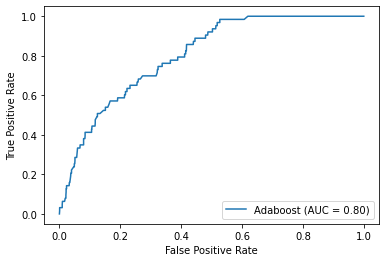

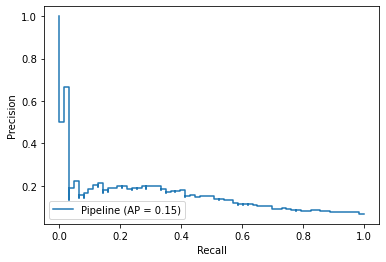

In [24]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve,average_precision_score
plot_roc_curve(pipeline, X_test, y_test, name = 'Adaboost')
plot_precision_recall_curve(pipeline, X_test, y_test)

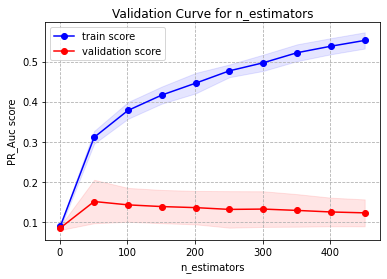

In [12]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',random_state=40,max_depth=1)))
n_estimators = list(range(1,500,50))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="adaboostclassifier__n_estimators", param_range=n_estimators,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(n_estimators, train_scores, test_scores, "n_estimators", title="Validation Curve for n_estimators", alpha=0.1)

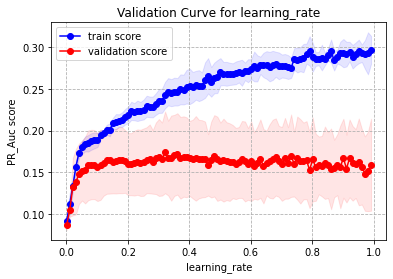

In [12]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',random_state=40,max_depth=1)))
learning_rates = list(np.arange(.001, 1, .01))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="adaboostclassifier__learning_rate", param_range=learning_rates,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(learning_rates, train_scores, test_scores,'learning_rate', title="Validation Curve for learning_rate", alpha=0.1)